In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/intro_data_science/Project/Resume Projects/Movies/moviedb.csv')

In [ ]:
df.head()

,Unnamed: 0,id,title,overview,release_date,popularity,poster_path,vote_average,vote_count
0,0,24438,Did You Hear About the Morgans?,New Yorkers Paul and Meryl Morgan seem to have...,2009-12-17,14.832,/f4ueTTP7pCLau2hoAGMuzrgg8rL.jpg,5.369,911
1,1,11231,The Next Karate Kid,"Mr. Miyagi decides to take Julie, a troubled t...",1994-07-18,23.460,/wI3gCi9w1cuUJCiwhviAy46we9Q.jpg,5.367,939
2,2,42194,Tekken,"In the year of 2039, after World Wars destroy ...",2010-03-20,17.098,/1xO2LirDZstkqZic1FwfK6GJIHH.jpg,5.365,635
3,3,12767,Cold Creek Manor,A family moves from New York into an old mansi...,2003-09-19,15.491,/3FyQ5sCGpDS0H2s12CDK0mljIP9.jpg,5.365,437
4,4,13051,Max Payne,A DEA agent whose family was slain as part of ...,2008-10-15,17.068,/3cWnCG5NyXJYARO2hmNqfbbgrMA.jpg,5.364,1927


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17620 entries, 0 to 17619
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17620 non-null  int64  
 1   id            17620 non-null  int64  
 2   title         17620 non-null  object 
 3   overview      17619 non-null  object 
 4   release_date  17620 non-null  object 
 5   popularity    17620 non-null  float64
 6   poster_path   17616 non-null  object 
 7   vote_average  17620 non-null  float64
 8   vote_count    17620 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
title,0
overview,1
release_date,0
popularity,0
poster_path,4
vote_average,0
vote_count,0


In [ ]:
#dropping the following columns as they are not relevant to analysis
df = df.drop(['Unnamed: 0', 'poster_path', 'id'], axis=1)




In [ ]:
df.shape


(17620, 6)

In [ ]:
df.duplicated().sum()

np.int64(8579)

In [ ]:
df = df.drop_duplicates() #dropped 8579 duplicated values

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,popularity,vote_average,vote_count
count,9041.000000,9041.000000,9041.000000
mean,28.535513,6.645599,2000.366221
std,45.345257,0.789913,3154.559308
min,0.600000,3.699000,300.000000
25%,14.528000,6.110000,469.000000
50%,19.861000,6.664000,847.000000
75%,29.767000,7.215000,1982.000000
max,1857.801000,8.708000,34961.000000


- Both popularity and vote_count are highly skewed with many movies having low values and a few dominating the upper end.

- vote_average is more stable and normally distributed, with most ratings between 6 and 7.

- There is likely a positive correlation between popularity and vote count (popular movies get more votes).



In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])
print(df['release_date'].dtypes)

datetime64[ns]


In [ ]:
df['release_date'] = df['release_date'].dt.year
df['release_date'].dtypes

dtype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9041 entries, 0 to 17619
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         9041 non-null   object 
 1   overview      9040 non-null   object 
 2   release_date  9041 non-null   int32  
 3   popularity    9041 non-null   float64
 4   vote_average  9041 non-null   float64
 5   vote_count    9041 non-null   int64  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 459.1+ KB


In [ ]:
df.head()

,title,overview,release_date,popularity,vote_average,vote_count
0,Did You Hear About the Morgans?,New Yorkers Paul and Meryl Morgan seem to have...,2009,14.832,5.369,911
1,The Next Karate Kid,"Mr. Miyagi decides to take Julie, a troubled t...",1994,23.460,5.367,939
2,Tekken,"In the year of 2039, after World Wars destroy ...",2010,17.098,5.365,635
3,Cold Creek Manor,A family moves from New York into an old mansi...,2003,15.491,5.365,437
4,Max Payne,A DEA agent whose family was slain as part of ...,2008,17.068,5.364,1927


Categorize Vote Average column
We would cut the vote_average values and make 4 categories: popular, avergae, below_avg and not_popular to describe it more using categorize_col() function provided above

In [ ]:
def categorize_col(df, col, labels):
    """
    categorize a certain column based on its quartiles

    Args:
    (df)  df - dataframe we are processing
    (col) str - to be categorized column's name
    (labels) list - list of labels from min to max

    Returns:
    (df)   df - dataframe with the categorized col

    """

    # setting the edges to cut the clumn accordingly
    limits = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], limits, labels = labels, duplicates='drop')
    return df

In [ ]:
# define labels for limits
labels = ['not_popular', 'below_avg', 'average', 'popular']

# categorize column baesd on labls and edges
categorize_col(df, 'vote_average', labels)

# confirming changes
df['vote_average'].unique()

['not_popular', 'popular', 'average', 'below_avg', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [ ]:
df.head()

,title,overview,release_date,popularity,vote_average,vote_count
0,Did You Hear About the Morgans?,New Yorkers Paul and Meryl Morgan seem to have...,2009,14.832,not_popular,911
1,The Next Karate Kid,"Mr. Miyagi decides to take Julie, a troubled t...",1994,23.460,not_popular,939
2,Tekken,"In the year of 2039, after World Wars destroy ...",2010,17.098,not_popular,635
3,Cold Creek Manor,A family moves from New York into an old mansi...,2003,15.491,not_popular,437
4,Max Payne,A DEA agent whose family was slain as part of ...,2008,17.068,not_popular,1927


In [ ]:
df['vote_average'].value_counts()


,count
vote_average,
average,2264
not_popular,2261
below_avg,2260
popular,2255


In [ ]:
df['vote_average'].dropna()

,vote_average
0,not_popular
1,not_popular
2,not_popular
3,not_popular
4,not_popular
...,...
17614,not_popular
17615,not_popular
17616,not_popular
17617,not_popular


In [ ]:
df.isna().sum()

,0
title,0
overview,1
release_date,0
popularity,0
vote_average,1
vote_count,0


In [ ]:
df[['vote_average','overview']].dropna()

,vote_average,overview
0,not_popular,New Yorkers Paul and Meryl Morgan seem to have...
1,not_popular,"Mr. Miyagi decides to take Julie, a troubled t..."
2,not_popular,"In the year of 2039, after World Wars destroy ..."
3,not_popular,A family moves from New York into an old mansi...
4,not_popular,A DEA agent whose family was slain as part of ...
...,...,...
17614,not_popular,When young Joshua learns that he will be going...
17615,not_popular,"When Edward, Peter, Lucy and Susan each follow..."
17616,not_popular,"Five deadbeat, sex-crazed friends forge their ..."
17617,not_popular,Taking inspiration from The Human Centipede fi...


Data Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

Which movie got the lowest popularity

In [ ]:
df[df['popularity'] == df['popularity'].max()]

,title,overview,release_date,popularity,vote_average,vote_count
5492,Rebel Moon - Part One: A Child of Fire,When a peaceful colony on the edge of the gala...,2023,1857.801,below_avg,794


Which movie got the lowest popularity

In [ ]:
df[df['popularity'] == df['popularity'].min()]

,title,overview,release_date,popularity,vote_average,vote_count
37,Grave of the Fireflies,"In the final months of World War II, 14-year-o...",1988,0.6,popular,5009
69,Hotarubi no Mori e,One hot summer day a little girl gets lost in ...,2011,0.6,popular,1017
3294,Odds and Evens,A bumbling government agent recruits a trucker...,1978,0.6,average,360
3454,Tracks,Accompanied only by her faithful dog and four ...,2013,0.6,average,476
7331,G.B.F.,The bitter fight for supremacy between the thr...,2014,0.6,not_popular,381
8451,Serial Teachers,With only 12 percent of its pupils obtaining t...,2013,0.6,not_popular,1163


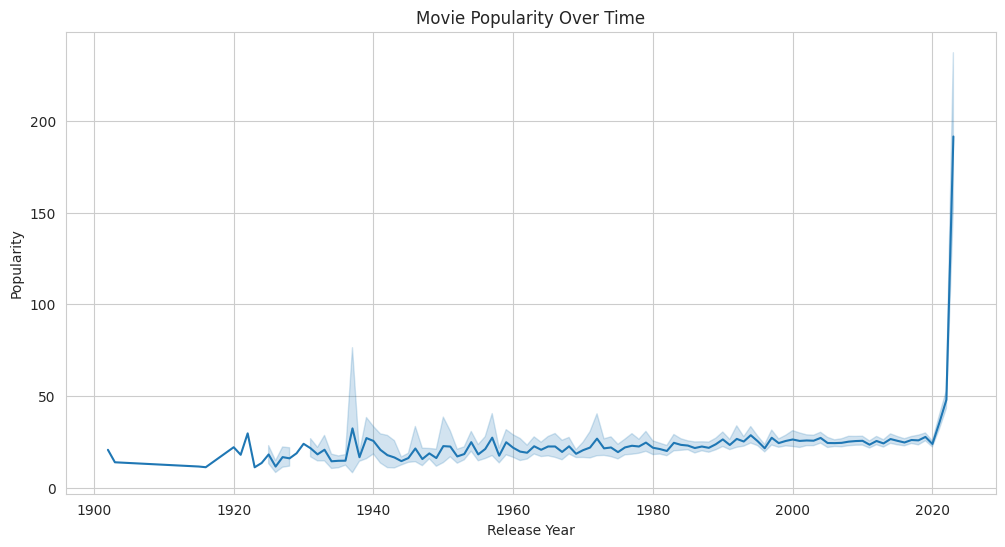

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='popularity', data=df)
plt.title('Movie Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.show()
